/home/bli/.local/lib/python3.6/site-packages/ipykernel/__main__.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.


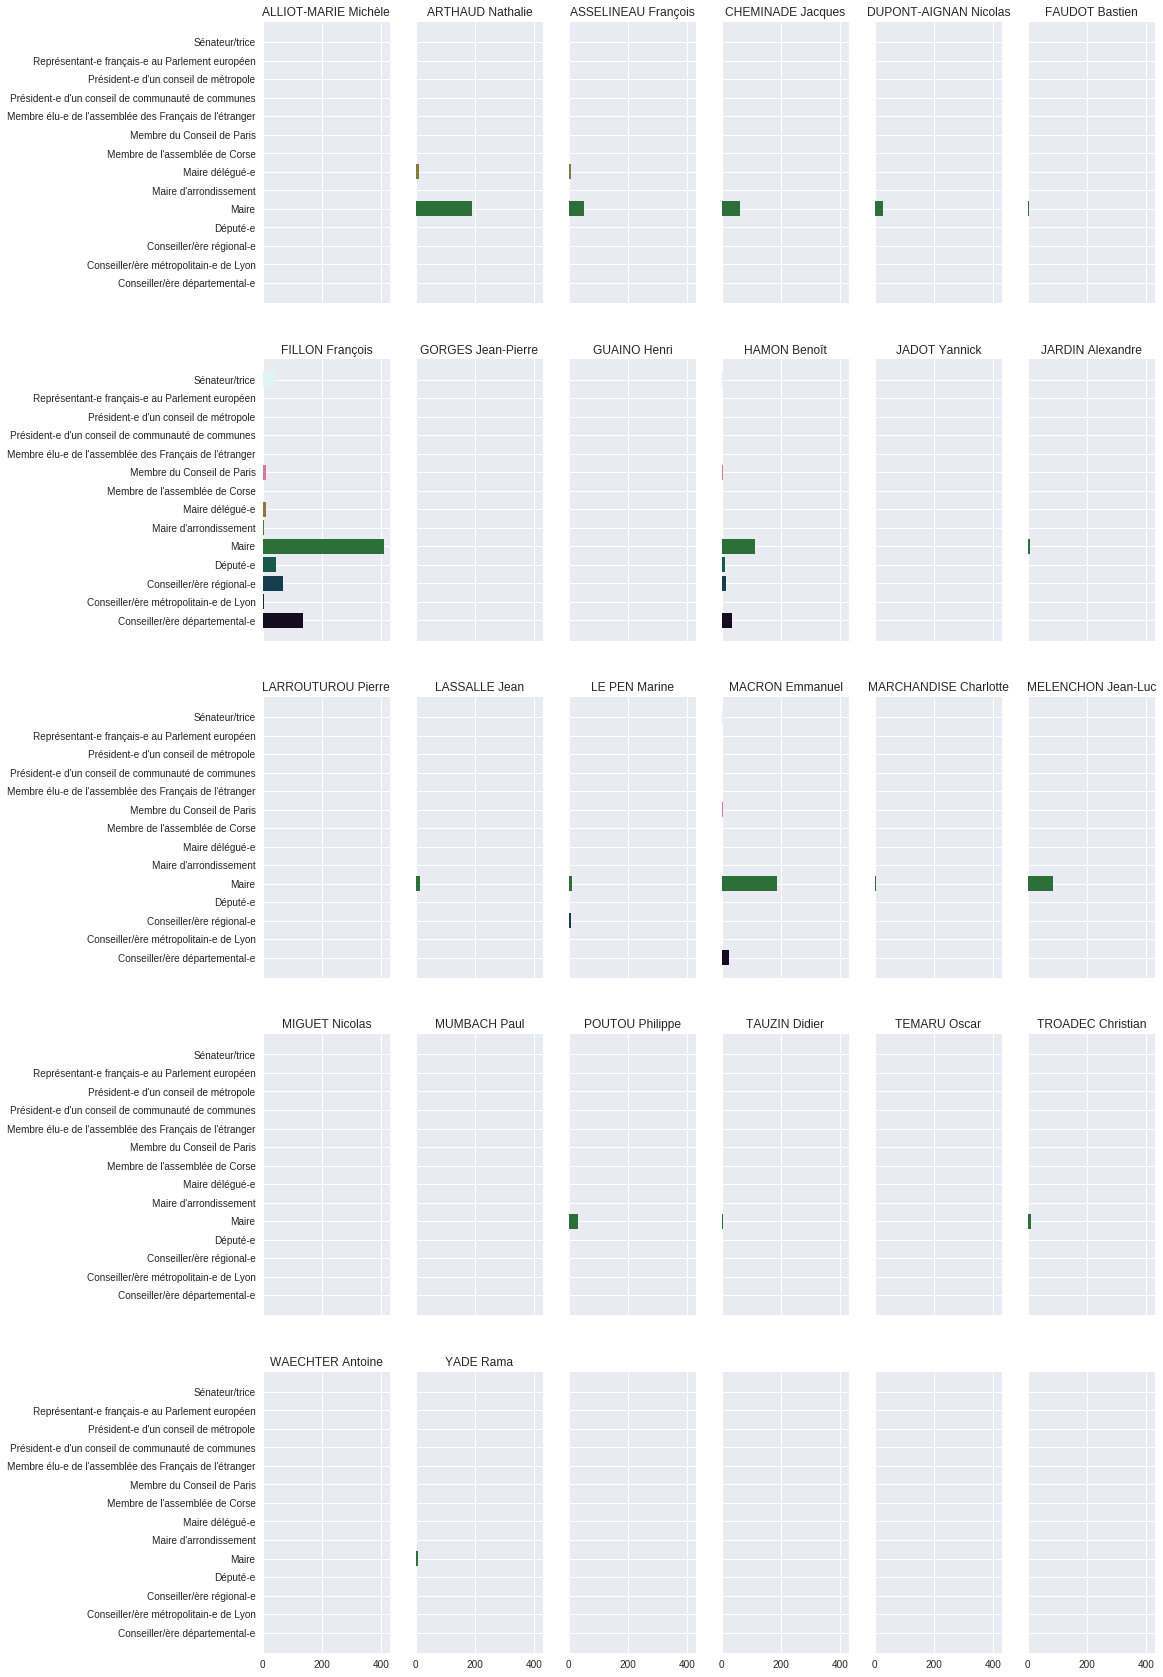

In [22]:
%matplotlib inline
import numpy as np
from itertools import repeat
from collections import Counter, OrderedDict
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16, 30]
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
parrainages = pd.read_table("/home/bli/Documents/prive/parainages_01032017.csv", index_col=(0, 1, 2))
parrainages.columns = ["mandat", "circonscription", "departement", "candidat", "date"]
by_candidate = parrainages.groupby("candidat")
mandats = sorted(parrainages["mandat"].unique())
nb_parrains = [
    348,  # sénateurs
    74,  # députés européens
    14,  # présidents de conseil de métropole
    1842,  # président de conseil de communauté de communes
    90,  # conseillers consulaires
    163,  # conseillers de Paris
    51,  # membres de l'assemblée de Corse
    1722 + 710,  # maires de communes déléguées et associées
    20 + 9 + 16,  # maires d'arrondissements de Paris, Lyon et Marseille
    35910,  # maires de communes
    577,  # députés
    (
        204  # Auvergne-Rhône-Alpes
        + 100  # Bourgogne-Franche-Comté
        + 83  # Bretagne
        + 77  # Centre-Val de Loire
        + 169  # Grand Est
        + 41  # Guadeloupe
        + 170  # Hauts-de-France
        + 209  # Île-de-France
        + 183  # Nouvelle-Aquitaine
        + 158  # Occitanie
        + 102  # Normandie
        + 93  # Pays de la Loire
        + 123  # PACA
        + 45  # Réunion
    ),  # conseillers régionaux
    165,  # conseillers métropolitains de Lyon
    4058  # conseillers départementaux
]
# nb_mandats = dict(zip(mandats, nb_parrains))
palette = sns.color_palette("cubehelix", len(mandats))
fig, axes = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True)
for candidate, ax in zip(by_candidate.groups.keys(), axes.ravel()):
    d = OrderedDict(zip(mandats, repeat(0)))
    d.update(Counter(parrainages.loc[by_candidate.groups[candidate], "mandat"]))
    # pourcent_parrains = 100 * np.asarray(list(d.values())) / np.asarray(nb_parrains)
    ax.barh(list(range(len(mandats))), list(d.values()), color=palette, tick_label=list(d.keys()))
    # ax.barh(list(range(len(mandats))), pourcent_parrains, color=palette, tick_label=list(d.keys()))
    ax.set_title(candidate)